In [1]:
import pandas as pd
import numpy as np
import re 

In [28]:
# load the CSV file
df = pd.read_csv(r"disney movie total gross.csv", delimiter=',' )
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

,Movie Title,Date Released,Genre,MPAA Rating,Total Gross,Inflation Adjusted Gross
0,Snow White and the Seven Dwarfs,21/12/1937,Musical,G,184925485,5228953251
1,Pinocchio,09/02/1940,Adventure,G,84300000,2188229052
2,Fantasia,13/11/1940,Musical,G,83320000,2187090808
3,Song of the South,12/11/1946,Adventure,G,65000000,1078510579
4,Cinderella,15/02/1950,Drama,G,85000000,920608730
5,"20,000 Leagues Under the Sea",23/12/1954,Adventure,Unknown,28200000,528279994
6,Lady and the Tramp,22/06/1955,Drama,G,93600000,1236035515
7,Sleeping Beauty,29/01/1959,Drama,Unknown,9464608,21505832
8,101 Dalmatians,25/01/1961,Comedy,G,153000000,1362870985
9,The Absent Minded Professor,16/03/1961,Comedy,Unknown,25381407,310094574


In [3]:
# validating data by checking the date formats
type=[]
for val1,val2,val3,val4 in zip(df['Movie Title'],df['Date Released'],df['Genre'],df['MPAA Rating']):
     type.append(isinstance(val1,str))
     type.append(isinstance(val2,str))
     type.append(isinstance(val3,str))
     type.append(isinstance(val4,str))
 
if all(type):
    print("all values are of string type")


valid_gross=True
for value1,value2 in zip(df['Total Gross'],df['Inflation Adjusted Gross']):
    if not isinstance(value1,int)  or not isinstance(value2,int) :
        valid_gross=False
        break
        
if valid_gross:
    print("all valid gross values")
else:
    print("not valid gross values")

all values are of string type
all valid gross values


In [4]:
valid_gross=True
for value1,value2 in zip(df['Total Gross'],df['Inflation Adjusted Gross']):
    if not isinstance(value1,int)  or not isinstance(value2,int) :
        valid_gross=False
        break
        
if valid_gross:
    print("all valid gross values")
else:
    print("not valid gross values")


all valid gross values


In [5]:
# check if there is any null values 
print(df.isnull().sum())

Movie Title                 0
Date Released               0
Genre                       0
MPAA Rating                 0
Total Gross                 0
Inflation Adjusted Gross    0
dtype: int64


In [6]:
# Fill the missing values 
df['MPAA Rating'] = df['MPAA Rating'].replace('Unknown',np.nan )
df.replace( np.nan ,'G', inplace= True)
df.head(30)

,Movie Title,Date Released,Genre,MPAA Rating,Total Gross,Inflation Adjusted Gross
0,Snow White and the Seven Dwarfs,21/12/1937,Musical,G,184925485,5228953251
1,Pinocchio,09/02/1940,Adventure,G,84300000,2188229052
2,Fantasia,13/11/1940,Musical,G,83320000,2187090808
3,Song of the South,12/11/1946,Adventure,G,65000000,1078510579
4,Cinderella,15/02/1950,Drama,G,85000000,920608730
5,"20,000 Leagues Under the Sea",23/12/1954,Adventure,G,28200000,528279994
6,Lady and the Tramp,22/06/1955,Drama,G,93600000,1236035515
7,Sleeping Beauty,29/01/1959,Drama,G,9464608,21505832
8,101 Dalmatians,25/01/1961,Comedy,G,153000000,1362870985
9,The Absent Minded Professor,16/03/1961,Comedy,G,25381407,310094574


In [7]:
corrected_genre ={
        'The Many Adventures of Winnie the Pooh'    :   'Comedy',
        'Herbie Goes to Monte Carlo'                :   'Adventure/Comedy',
        'The Black Hole'                            :   'Action',
        'Midnight Madness'                          :   'Comedy',
        "The Last Flight of Noah's Ark"            :   'Adventure',
        'The Devil and Max Devlin'                  :   'Comedy/Fantasy',
        'Newsies'                                   :   'Drama/Musical',
        'Passed Away'                               :   'Dark Comedy',
        "A Gun in Betty Lou's Handbag"              :   'Comedy',
        'Bound by Honor'                            :   'Tragedy',
        "My Boyfriend's Back"                       :   'Romantic Comedy',
        'Father Hood'                               :   'Adventure/Comedy',
        'Red Rock West'                             :   'Crime/Thriller',
        'The War at Home'                           :   'Drama',
        'Endurance'                                 :   'Drama',
        'High Heels and Low Lifes'                  :   'Drama Comed/Action',
        'Frank McKlusky C.I.'                       :   'Comedy'
            }

temp_df = df.loc[ df['Genre'] == 'Unkown']
for i in range( len(df)):
    if df.iat[i,0] in corrected_genre.keys():
        movie_title = df.iat[i,0]
        df.iat[i,2] = corrected_genre.get(movie_title)

print(df['Genre'].value_counts())

Genre
Comedy                 186
Adventure              130
Drama                  116
Action                  41
Thriller/Suspense       24
Romantic Comedy         24
Musical                 16
Documentary             16
Western                  7
Horror                   6
Black Comedy             3
Adventure/Comedy         2
Concert/Performance      2
Drama/Musical            1
Comedy/Fantasy           1
Crime/Thriller           1
Tragedy                  1
Dark Comedy              1
Drama Comed/Action       1
Name: count, dtype: int64


In [8]:
# check for repetitions in data
print(df.duplicated().sum().sum())
repetition=df.duplicated()
if repetition.sum()!=0:
      df.drop_duplicates(subset=['Movie Title'],keep='first')

0


In [9]:
#Tokenizing text data
df['Title_Tokens'] = df['Movie Title'].str.split()
print(df)
print(df[['Movie Title', 'Title_Tokens']])

                                          Movie Title Date Released  \
0                     Snow White and the Seven Dwarfs    21/12/1937   
1                                           Pinocchio    09/02/1940   
2                                            Fantasia    13/11/1940   
3                                   Song of the South    12/11/1946   
4                                          Cinderella    15/02/1950   
5                        20,000 Leagues Under the Sea    23/12/1954   
6                                  Lady and the Tramp    22/06/1955   
7                                     Sleeping Beauty    29/01/1959   
8                                      101 Dalmatians    25/01/1961   
9                         The Absent Minded Professor    16/03/1961   
10                                   Babes in Toyland    14/12/1961   
11                                        Bon Voyage!    17/05/1962   
12                             The Sword in the Stone    25/12/1963   
13    

In [10]:
#reformatting
def c(date_text):
   date=re.findall(r'(\d{2})[-/]?(\d{2})[-/]?(\d{4})',date_text)
   if date:
        day,month,year=date[0]
        return(f'{year}-{month}-{day}')
   return None
    
df['Date Released']= df['Date Released'].apply(c)
df['Movie Title']=df['Movie Title'].str.lower()
df['Genre']=df['Genre'].str.lower()

df

,Movie Title,Date Released,Genre,MPAA Rating,Total Gross,Inflation Adjusted Gross,Title_Tokens
0,snow white and the seven dwarfs,1937-12-21,musical,G,184925485,5228953251,"[Snow, White, and, the, Seven, Dwarfs]"
1,pinocchio,1940-02-09,adventure,G,84300000,2188229052,[Pinocchio]
2,fantasia,1940-11-13,musical,G,83320000,2187090808,[Fantasia]
3,song of the south,1946-11-12,adventure,G,65000000,1078510579,"[Song, of, the, South]"
4,cinderella,1950-02-15,drama,G,85000000,920608730,[Cinderella]
5,"20,000 leagues under the sea",1954-12-23,adventure,G,28200000,528279994,"[20,000, Leagues, Under, the, Sea]"
6,lady and the tramp,1955-06-22,drama,G,93600000,1236035515,"[Lady, and, the, Tramp]"
7,sleeping beauty,1959-01-29,drama,G,9464608,21505832,"[Sleeping, Beauty]"
8,101 dalmatians,1961-01-25,comedy,G,153000000,1362870985,"[101, Dalmatians]"
9,the absent minded professor,1961-03-16,comedy,G,25381407,310094574,"[The, Absent, Minded, Professor]"


In [11]:
#normlizing using minimax
import statistics  
df['Date Released'] = pd.to_numeric(df['Date Released'],errors='coerce')                                                                 
df['Date Released']=(df["Date Released"]- df["Date Released"].min()/
                    df["Date Released"].max()-df["Date Released"].min())

In [12]:
#find the most profitable genres
def find_profitable_genre(value):
    '''find the genre for a giving total gross '''
    for key, number in categorize.items():
        if number == value:
            return key

categorize= {}
for total_gross, genre in zip(df['Total Gross'], df['Genre']):
    if genre in categorize:
        categorize[genre] += total_gross
    else:
        categorize[genre] = total_gross

sum_of_gross = list(categorize.values())
sum_of_gross.sort(reverse= True)
print('The top three profitable genres are:')
for i in range(1, 4):
    profitable_genre  = find_profitable_genre(sum_of_gross[i-1])
    print(f'{i}.{profitable_genre} with {sum_of_gross[i-1]}')

# find The highest-grossing movie
highest_gross = max(df['Total Gross'].values)
highest_gross_movie = df.loc[df['Total Gross']== highest_gross, 'Movie Title'].values
print(f'The highest-grossing Disney movie is {highest_gross_movie[0]}- total gross: {highest_gross}')

The top three profitable genres are:
1.adventure with 16400069453
2.comedy with 8126111138
3.action with 4220405183
The highest-grossing Disney movie is star wars ep. vii: the force awakens- total gross: 936662225


In [13]:
#Finding central values
#find Total Gross mean, median and mode
mean0 =df['Total Gross'].mean()
print(f'mean = {mean0}')

median=df['Total Gross'].median()
print(f'median = {median}')

mode=df['Total Gross'].mode()
print(f'mode = {mode[0]}')

mean = 64701788.51986183
median = 30702446.0
mode = 0


In [14]:
#find Inflation Adjusted Gross mean, meadian and mode
mean1=df['Inflation Adjusted Gross'].mean()
print(f'mean = {mean1}')

median1=df['Inflation Adjusted Gross'].median()
print(f'median = {median1}')

mode1=df['Inflation Adjusted Gross'].mode()[0]
print(f'mode = {mode1}')

mean = 118762523.31088082
median = 55159783.0
mode = 0


In [15]:
#MPAA Rating mode
mode2=df['MPAA Rating'].mode()
print(mode2[0])

#Movie Title mode
mode3=df['Movie Title'].mode()
print(mode3[0])

#Genre mode
mode4= df['Genre'].mode()
print(mode4[0])

PG
the jungle book
comedy


In [16]:
#Date Released mode
mode5 = df['Date Released'].mode().iloc[0] if not df['Date Released'].mode().empty else 'date released is empty'
print(mode5)

date released is empty


In [17]:
#Grouping and aggregating data
group_by_frame=df.groupby("Genre")
group_by_frame.agg({'Inflation Adjusted Gross':['max','min','count','mean','sum']})
group_by_frame.agg({'Total Gross':['max','min','count','mean','sum']})
group_by_frame.describe()

Date Released                              Total Gross  \
                            count mean std min 25% 50% 75% max       count   
Genre                                                                        
action                        0.0  NaN NaN NaN NaN NaN NaN NaN        41.0   
adventure                     0.0  NaN NaN NaN NaN NaN NaN NaN       130.0   
adventure/comedy              0.0  NaN NaN NaN NaN NaN NaN NaN         2.0   
black comedy                  0.0  NaN NaN NaN NaN NaN NaN NaN         3.0   
comedy                        0.0  NaN NaN NaN NaN NaN NaN NaN       186.0   
comedy/fantasy                0.0  NaN NaN NaN NaN NaN NaN NaN         1.0   
concert/performance           0.0  NaN NaN NaN NaN NaN NaN NaN         2.0   
crime/thriller                0.0  NaN NaN NaN NaN NaN NaN NaN         1.0   
dark comedy                   0.0  NaN NaN NaN NaN NaN NaN NaN         1.0   
documentary                   0.0  NaN NaN NaN NaN NaN NaN NaN        16.0   
drama                         0.0  NaN NaN NaN NaN NaN NaN NaN       116.0   
drama comed/action            0.0  NaN NaN NaN NaN NaN NaN NaN         1.0   
drama/musical                 0.0  NaN NaN NaN NaN NaN NaN NaN         1.0   
horror                        0.0  NaN NaN NaN NaN NaN NaN NaN         6.0   
musical                       0.0  NaN NaN NaN NaN NaN NaN NaN        16.0   
romantic comedy               0.0  NaN NaN NaN NaN NaN NaN NaN        24.0   
thriller/suspense             0.0  NaN NaN NaN NaN NaN NaN NaN        24.0   
tragedy                       0.0  NaN NaN NaN NaN NaN NaN NaN         1.0   
western                       0.0  NaN NaN NaN NaN NaN NaN NaN         7.0   

                                                                          \
                             mean           std         min          25%   
Genre                                                                      
action               1.029367e+08  1.387168e+08         0.0  29028000.00   
adventure            1.261544e+08  1.419568e+08      2815.0  24029017.75   
adventure/comedy     1.563410e+07  1.748802e+07   3268203.0   9451152.25   
black comedy         3.251440e+07  1.803695e+07  17105219.0  22594788.00   
comedy               4.368877e+07  4.548823e+07         0.0  12455326.00   
comedy/fantasy       1.600000e+07           NaN  16000000.0  16000000.00   
concert/performance  5.172823e+07  1.916761e+07  38174685.0  44951459.00   
crime/thriller       2.502551e+06           NaN   2502551.0   2502551.00   
dark comedy          4.030793e+06           NaN   4030793.0   4030793.00   
documentary          1.129285e+07  1.028833e+07     20521.0   1122075.50   
drama                3.540721e+07  3.874049e+07         0.0   7764225.75   
drama comed/action   2.267920e+05           NaN    226792.0    226792.00   
drama/musical        2.706352e+06           NaN   2706352.0   2706352.00   
horror               1.451148e+07  9.377734e+06   4877567.0   6386971.75   
musical              7.233026e+07  6.515831e+07   5632086.0  23016824.25   
romantic comedy      4.814274e+07  4.932506e+07    468240.0  12717495.25   
thriller/suspense    5.861694e+07  7.089503e+07   2154540.0  17989472.00   
tragedy              4.496583e+06           NaN   4496583.0   4496583.00   
western              5.128735e+07  2.737498e+07   8247627.0  39455713.50   

                                                            \
                            50%           75%          max   
Genre                                                        
action               43061982.0  1.037387e+08  623279547.0   
adventure            64469727.0  1.985655e+08  936662225.0   
adventure/comedy     15634101.5  2.181705e+07   28000000.0   
black comedy         28084357.0  4.021900e+07   52353636.0   
comedy               26395588.0  6.188156e+07  244082982.0   
comedy/fantasy       16000000.0  1.600000e+07   16000000.0   
concert/performance  51728233.0  5.850501e+07   65281781.0   
crime/thri

In [18]:
# Finding the movies that have remake storylines.
print(df['Movie Title'].value_counts().to_string())

The_Jungle_Book =[]
for i in range(len(df)):
    if  df.iat[i,0] =='The Jungle Book':
        The_Jungle_Book+=[df.iat[i,4]]
Most_The_Jungle_Book=0
for i in The_Jungle_Book:
    if i>Most_The_Jungle_Book:
        Most_The_Jungle_Book=i


Dalmatians  =[]
for i in range(len(df)):
    if  df.iat[i,0] =='101 Dalmatians ':
        Dalmatians +=[df.iat[i,4]]
Most_Dalmatians  =0
for i in Dalmatians  :
    if i>Most_Dalmatians  :
        Most_Dalmatians  =i

Bad_Company  =[]
for i in range(len(df)):
    if  df.iat[i,0] =='Bad Company ':
        Bad_Company +=[df.iat[i,4]]
Most_Bad_Company =0
for i in Bad_Company :
    if i>Most_Bad_Company :
        Most_Bad_Company =i
print(Most_Bad_Company)
Freaky_Friday =[]
for i in range(len(df)):
    if  df.iat[i,0] =='Freaky Friday':
        Freaky_Friday+=[df.iat[i,4]]
Most_Freaky_Friday=0
for i in Freaky_Friday:
    if i>Most_Freaky_Friday:
        Most_Freaky_Friday=i


Cinderella=[]
for i in range(len(df)):
    if  df.iat[i,0] =='Cinderella':
        Cinderella+=[df.iat[i,4]]
Most_Cinderella=0
for i in Cinderella:
    if i>Most_Cinderella:
        Most_Cinderella=i

# find the remake movie with the highest total gross 
Total_Gross=pd.Series({'The Jungle Book':Most_The_Jungle_Book,'101 Dalmatians':Most_Dalmatians,
             'Bad Company':Most_Bad_Company,'Freaky Friday':Most_Freaky_Friday,'Cinderella':Most_Cinderella })
print(Total_Gross)

Movie Title
the jungle book                                     3
cinderella                                          2
bad company                                         2
freaky friday                                       2
101 dalmatians                                      2
the apple dumpling gang                             1
the many adventures of winnie the pooh              1
the rescuers                                        1
herbie goes to monte carlo                          1
the black hole                                      1
midnight madness                                    1
the last flight of noah's ark                       1
the devil and max devlin                            1
amy                                                 1
the fox and the hound                               1
war horse                                           1
3 men and a baby                                    1
big hero 6                                          1
captain america:

In [19]:
# finding common words 
import pandas as pd
from collections import Counter 


words=[word for tokens in df['Title_Tokens'] for word in tokens]
counting=Counter(words)
common_words =counting.most_common(5)
print(common_words)

[('The', 130), ('the', 53), ('of', 44), ('and', 22), ('in', 17)]


In [20]:
import matplotlib.pyplot as plt

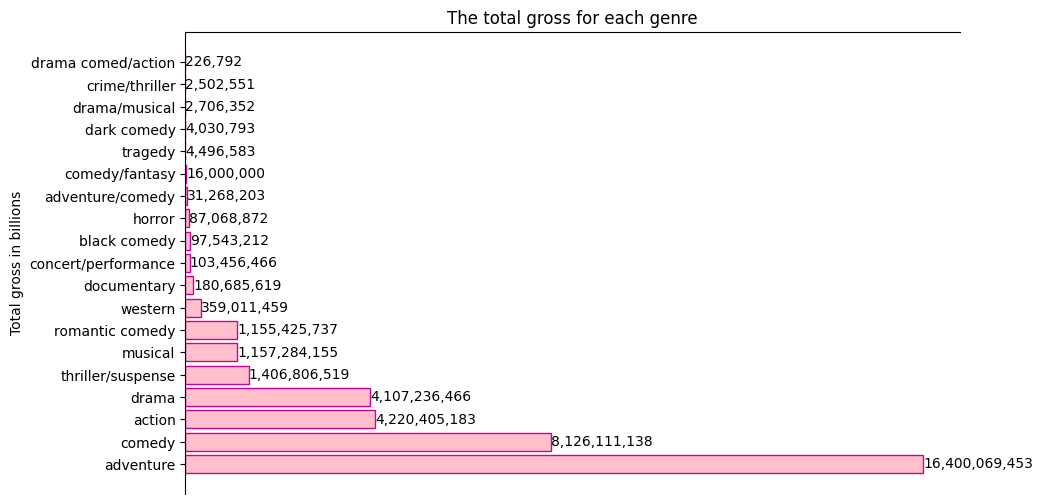

In [21]:
# Visualize the The total gross for each genre using bar chart
x = [find_profitable_genre(sum_of_gross[i])for i in range(len(sum_of_gross))] 
y = sum_of_gross
fig = plt.figure(figsize=(10,6))
ax =plt.axes()
bar_chart = plt.barh(x, y, color='pink',edgecolor='#CC0099')
ax.xaxis.set_visible(False)
ax.spines[['right','bottom']].set_visible(False)
ax.bar_label(bar_chart, fmt=lambda number: f'{int(number):,}')

plt.title('The total gross for each genre')
plt.ylabel('Total gross in billions')
plt.show()

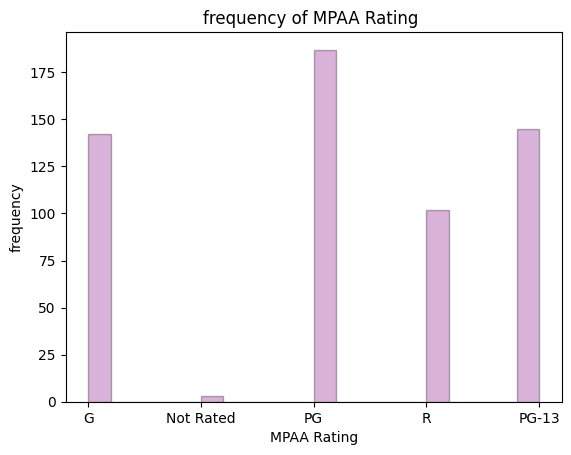

In [22]:
# Visualization using histogram for frequency of MPAA Rating
plt.figure()
plt.hist(df['MPAA Rating'],color='purple',alpha=0.3,bins=20,edgecolor='black')
plt.xlabel('MPAA Rating')
plt.ylabel('frequency')
plt.title('frequency of MPAA Rating ')
plt.show()

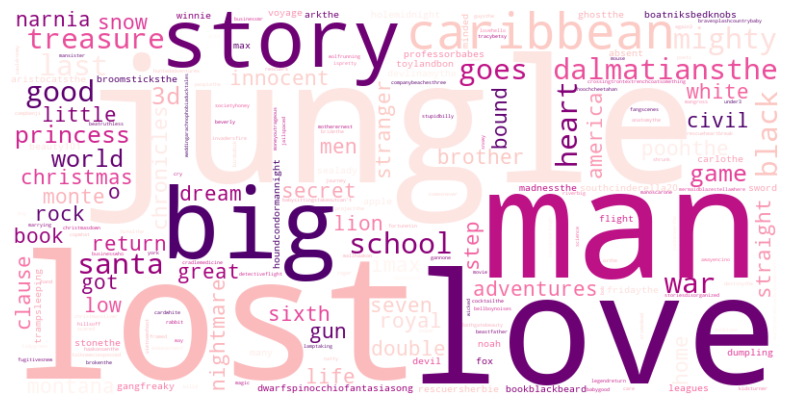

In [23]:
#  text data visualization for 'Movie Titles' by using Word Cloud
from wordcloud import WordCloud
frequency=df['Movie Title'].str.cat(sep='')
wc = WordCloud(width=800, height=400, background_color="white",colormap='RdPu')
wc.generate(frequency)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off") 
plt.show()

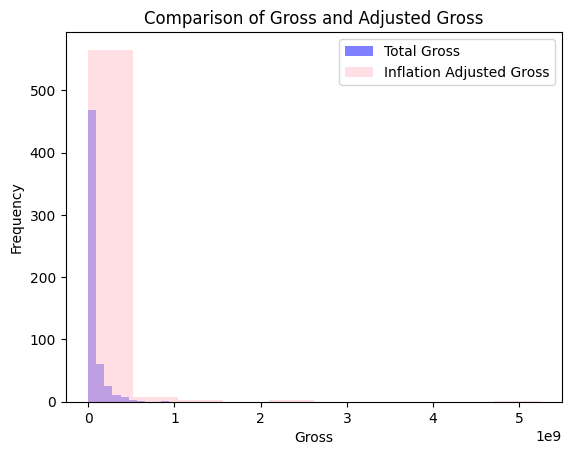

In [24]:
# Comparison of Gross and Adjusted Gross
plt.hist(df['Total Gross'], bins=10, alpha=0.5, label='Total Gross', color='blue')
plt.hist(df['Inflation Adjusted Gross'], bins=10, alpha=0.5, label='Inflation Adjusted Gross', color='pink')
plt.title('Comparison of Gross and Adjusted Gross')
plt.xlabel('Gross')
plt.ylabel('Frequency')
plt.legend()
plt.show()

(4, 4)


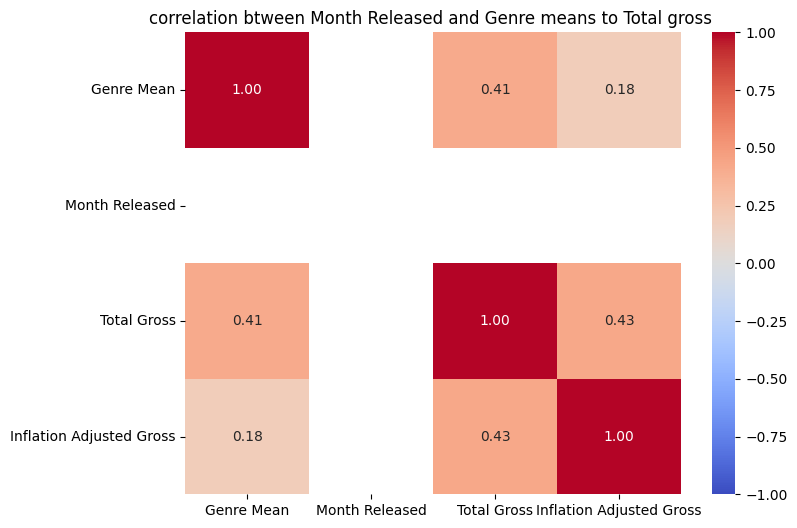

In [25]:
# heatmap to show the correlation between genre means and released month and inflation adjusted gross to the total gross
import seaborn as sns
gross_correlation= df['Inflation Adjusted Gross'].corr(df['Total Gross'])
gross_correlation
genre_means= df.groupby("Genre")["Total Gross"].mean()
df["Genre Mean"]= df["Genre"].map(genre_means)
correlation= df['Total Gross'].corr(df['Genre Mean'])
df['Date Released']=pd.to_datetime(df['Date Released'])
df['Month Released']= df['Date Released'].dt.month
Correlation_based_on_month= df['Month Released'].corr(df['Total Gross'])
corr_matrix= df[['Genre Mean','Month Released','Total Gross','Inflation Adjusted Gross']].corr()
print(corr_matrix.shape)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm",fmt=".2f",vmin=-1,vmax=1)
plt.title(f"correlation btween Month Released and Genre means to Total gross ")
plt.show()

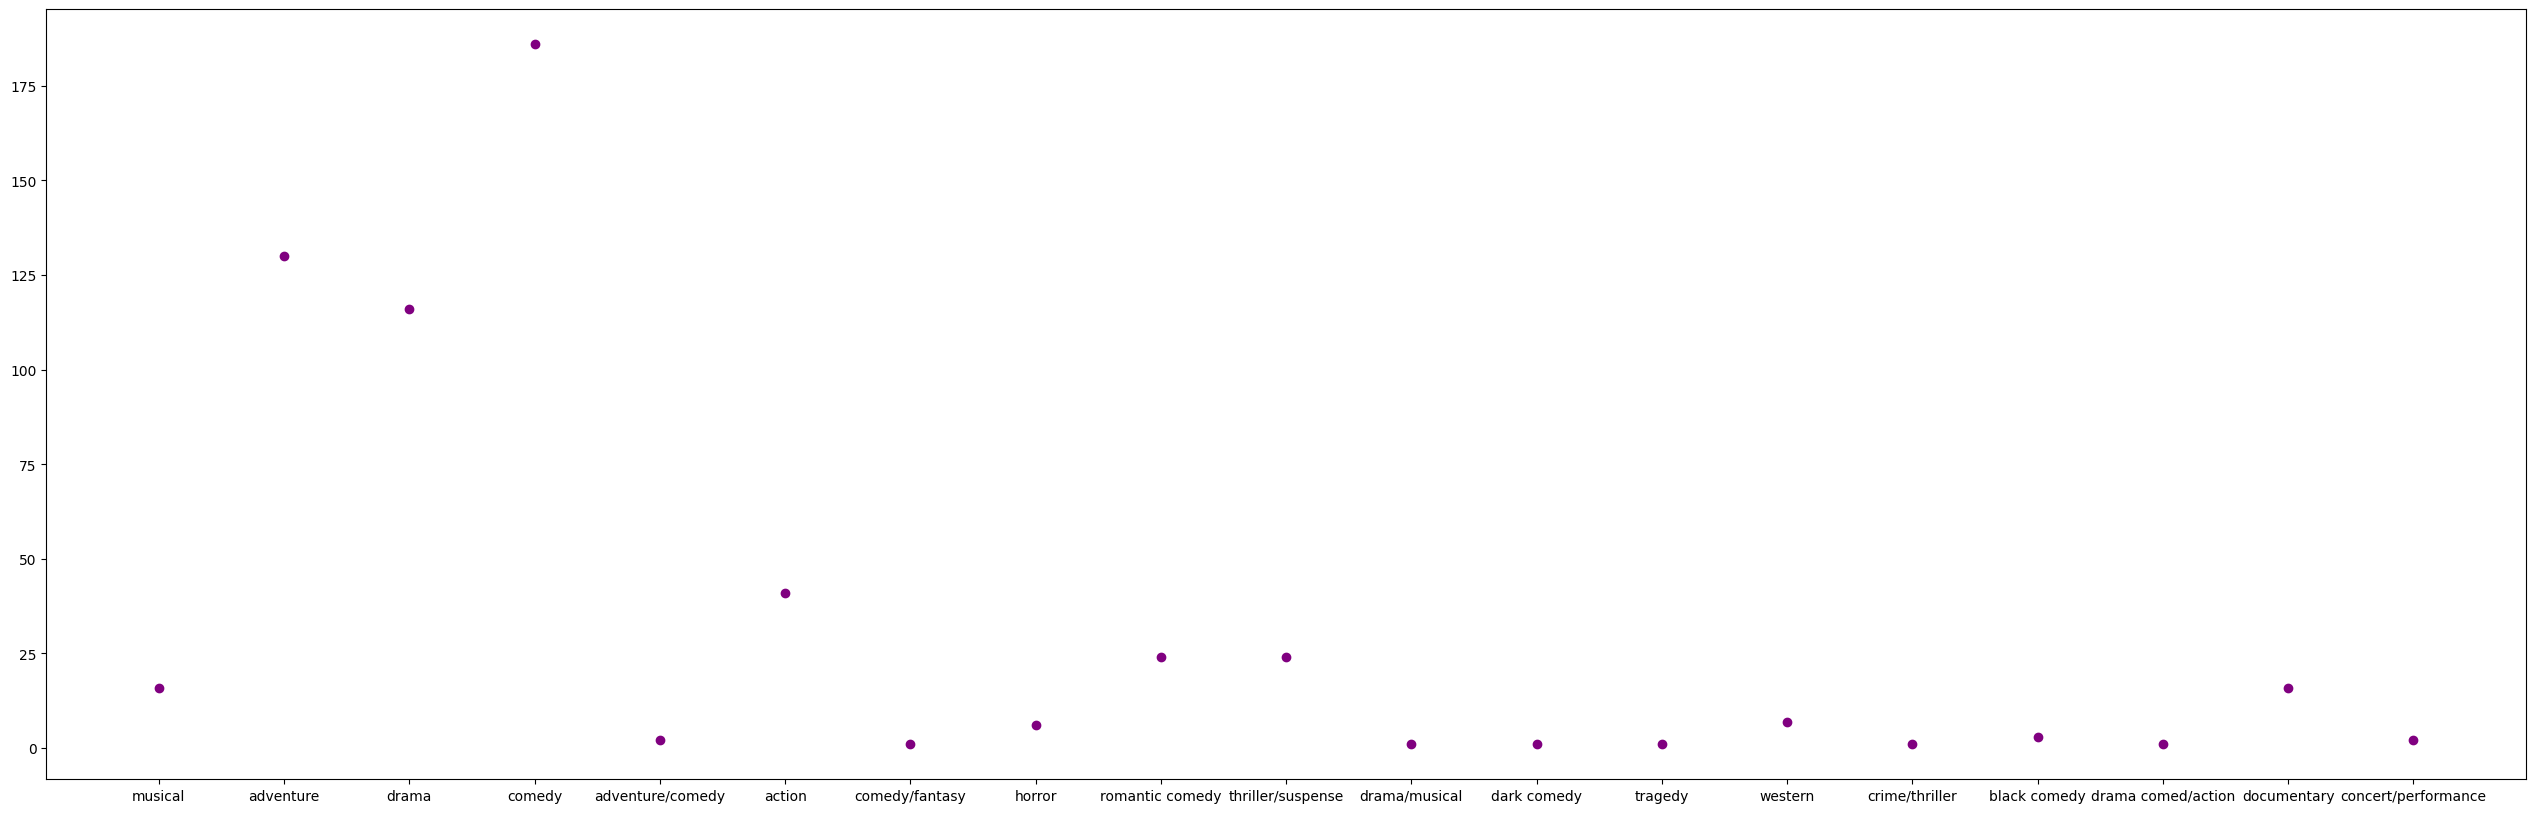

In [26]:
# count the genre for each movie
genre_count={}
for genre in df['Genre']:
    if genre in genre_count:
        genre_count[genre]+=1
    else:
        genre_count[genre]=1
# visulize the genres and number of movies in each one
plt.figure(figsize=(32,10))
x = genre_count.keys()
y = genre_count.values()
plt.plot(x, y, 'o', color='purple')
plt.show()

In [27]:
from PIL import Image
import random as rd
characters = {
    'Merida' : { 1: 'brave', 2:  'A forest or a natural place', 3: 'Traveling or exploring the world', 4: 'Adventure and excitemen',
                5: 'Learn and seek help from different sources' },
    'Mulan' : { 1: 'brave', 2: 'A forest or a natural place', 3: 'Innovation and learning new things', 4: 'Comedy',
                5: 'Search for new solutions by myself'
            },
    'Snow White': {1: 'kind heart', 2: 'A forest or a natural place' , 3: 'play with pets' , 4: 'Musical',
                   5: 'Ask for help from others'
                   },
    'Belle': { 1: 'genius' , 2: 'Library or laboratory', 3: 'Reading a book', 4: 'Fantasy and magic', 5: 'Search for new solutions by myself'
             },
    'Jasmine': { 1: 'brave',  2: 'A luxury resort', 3: 'Traveling or exploring the world' , 4: 'Fantasy and magic', 5: 'Ask for help from others'
               },
    'Robot' : { 1: 'Other',  2: 'Other', 3: 'Other' , 4: 'Other', 5: 'Other'
               },
      }
questions =['1. How would your friends describe you?\n A- brave\t B- optimistic\n C- genius\t D- kind heart\n E- Other\n',
            '2. Where do you prefer to spend your vacation?\n A- A luxury resort\t B- A forest or a natural place \nC- Library or laboratory \t D- Other\n'
            ,'3. How do you spend your free time?\n A- Reading a book\t B- play with pets\n C- Innovation and learning new things\t D- Traveling or exploring the world\n E- Other\n'
            ,'4. What is your favorite type of movie?\n A- Musical\t B- Adventure and excitement\n C- Fantasy and magic\t D- Comedy\n E- Other\n'
            ,'5. How do you act when you need help?\n A- Ask for help from others\t B- Search for new solutions by myself\n C- Learn and seek help from different sources\t D- Other'
            ]
user_answer ={}
user_disney_character ={key: 0 for key in characters}


for i in range(5):
    user = input(questions[i]).strip()
    user_answer[i+1] = user

for i in range(1,6):

    for character, traits in characters.items():
        trait = characters[character].get(i)
        point = user_answer.get(i)
        if point == trait:
            user_disney_character[character]+=1
        elif point == 'Other':
            user_disney_character['Robot']+= 1
            break

highest_point = 0
char = []
for character, point in user_disney_character.items():
    if point >= highest_point:
        highest_point = point
        char.append(character) 

random_char = char[rd.randrange(0, len(char))]
random_char
if random_char == 'Merida':
    print(f'The Disney princess character closest to your personality is: {random_char}')
    img = Image.open('Merida.png')
    img.show(title="Merida")
elif random_char =='Mulan':
    print(f'The Disney princess character closest to your personality is: {random_char}')
    img = Image.open('Mulan.jpg')
    img.show(title="Mulan")
elif random_char =='Belle':
    print(f'The Disney princess character closest to your personality is: {random_char}')
    img = Image.open('Belle.png')
    img.show(title="Belle")
elif random_char == 'Snow White':
    print(f'The Disney princess character closest to your personality is: {random_char}')
    img = Image.open('snow_white.png')
    img.show(title="Snow White")
elif random_char == 'Jasmine':
    print(f'The Disney princess character closest to your personality is: {random_char}')
    img = Image.open('Jasmine.png')
    img.show(title="Jasmine")
else:
    print(f'Error: you are a robot')
    img = Image.open('Robot.png')
    img.show(title="Error: you are a robot")

1. How would your friends describe you?
 A- brave	 B- optimistic
 C- genius	 D- kind heart
 E- Other
 brave
2. Where do you prefer to spend your vacation?
 A- A luxury resort	 B- A forest or a natural place 
C- Library or laboratory 	 D- Other
 A forest or a natural place
3. How do you spend your free time?
 A- Reading a book	 B- play with pets
 C- Innovation and learning new things	 D- Traveling or exploring the world
 E- Other
 Other
4. What is your favorite type of movie?
 A- Musical	 B- Adventure and excitement
 C- Fantasy and magic	 D- Comedy
 E- Other
 Fantasy and magic
5. How do you act when you need help?
 A- Ask for help from others	 B- Search for new solutions by myself
 C- Learn and seek help from different sources	 D- Other Other


The Disney princess character closest to your personality is: Jasmine
